In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_fscore_support

In [4]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [17]:
data = pd.read_csv("/Users/varunchowdary/Desktop/Credit_Card_Detection/Credit_Fraud_Detection/DataSets/fraud test.csv", sep=",")

In [18]:
y = data["is_fraud"]
x = data.drop("is_fraud", axis=1)
X = x
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Using code from Kaggle where the encode some of the variables with one hot encoding, delete unique identifer features, and also reformat some of the time data so that it is split up: https://www.kaggle.com/code/ivetrano/credit-card-fraud-prediction-99-7-accuracy

In [19]:
X_train = X_train.drop(['cc_num', 'first', 'last', 'zip', 'trans_num'], axis=1)
X_test = X_test.drop(['cc_num', 'first', 'last', 'zip', 'trans_num'], axis=1)
X_val = X_val.drop(['cc_num', 'first', 'last', 'zip', 'trans_num'], axis=1)

X_train[['date', 'time']] = X_train['trans_date_trans_time'].str.split(' ', expand=True)
X_test[['date', 'time']] = X_test['trans_date_trans_time'].str.split(' ', expand=True)
X_val[['date', 'time']] = X_val['trans_date_trans_time'].str.split(' ', expand=True)

X_train[['day', 'month', 'year']] = X_train['date'].str.split('/', expand=True)
X_test[['day', 'month', 'year']] = X_test['date'].str.split('/', expand=True)
X_val[['day', 'month', 'year']] = X_val['date'].str.split('/', expand=True)

X_train['time'] = X_train['time'].apply(lambda x: x.split(':')[0])
X_test['time'] = X_test['time'].apply(lambda x: x.split(':')[0])
X_val['time'] = X_val['time'].apply(lambda x: x.split(':')[0])

X_train = X_train.drop(['date', 'trans_date_trans_time', 'Unnamed: 0'], axis=1)
X_test = X_test.drop(['date', 'trans_date_trans_time', 'Unnamed: 0'], axis=1)
X_val = X_val.drop(['date', 'trans_date_trans_time','Unnamed: 0'], axis=1)

X_train['dob'] = X_train['dob'].apply(lambda x: x.split('/')[-1])
X_test['dob'] = X_test['dob'].apply(lambda x: x.split('/')[-1])
X_val['dob'] = X_val['dob'].apply(lambda x: x.split('/')[-1])

In [20]:
#Male Female encode to 0 and 1
X_train["gender"] = X_train["gender"].replace({'M': 0, 'F': 1})
X_test["gender"] = X_test["gender"].replace({'M': 0, 'F': 1})
X_val["gender"] = X_val["gender"].replace({'M': 0, 'F': 1})

In [21]:
cols_encoder = ["merchant", "category", "street", "job", "city", "state"]

encoder = ce.BinaryEncoder(cols=cols_encoder)

tra_encoder = encoder.fit_transform(X_train[cols_encoder])

valid_encod = encoder.transform(X_val[cols_encoder])
test_encode = encoder.transform(X_test[cols_encoder])

X_train = X_train.drop(columns=cols_encoder).join(tra_encoder)
X_val = X_val.drop(columns=cols_encoder).join(valid_encod)
X_test = X_test.drop(columns=cols_encoder).join(test_encode)

In [22]:
rf_base_model = RandomForestClassifier()
rf_base_model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
pred = rf_base_model.predict(X_test)

In [24]:
precision_recall_fscore_support(y_test,pred)

(array([0.99803134, 0.99610895]),
 array([0.99999277, 0.48393195]),
 array([0.99901109, 0.65139949]),
 array([138401,    529]))

<function matplotlib.pyplot.show(close=None, block=None)>

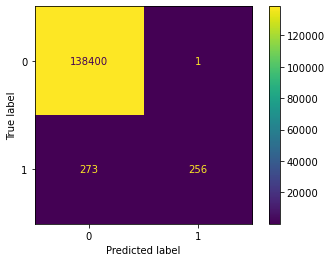

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix(y_test,pred)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,pred)
plt.show